In [7]:
import datetime
import json
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np



dataset_file_path = "../data/dados_2014-2022.csv"
dataset = pd.read_csv(dataset_file_path, index_col=0)

dataset_original = dataset.copy()
folder_figures = "../plots/"


In [8]:
dataset.columns

Index(['DownwardUsedSecondaryReserveEnergy',
       'UpwardUsedSecondaryReserveEnergy',
       'BaseDailyOperatingSchedulePBFSolarPV',
       'BaseDailyOperatingSchedulePBFWind',
       'BaseDailyOperatingShedulePBFTotalBalanceInterconnections',
       'DemandD+1DailyForecast', 'PhotovoltaicD+1DailyForecast',
       'SecondaryReserveAllocationADownward',
       'SecondaryReserveAllocationAUpward',
       'TotalBaseDailyOperatingSchedulePBFGeneration', 'WindD+1DailyForecast',
       'datetime'],
      dtype='object')

In [9]:
dataset.head()

,DownwardUsedSecondaryReserveEnergy,UpwardUsedSecondaryReserveEnergy,BaseDailyOperatingSchedulePBFSolarPV,BaseDailyOperatingSchedulePBFWind,BaseDailyOperatingShedulePBFTotalBalanceInterconnections,DemandD+1DailyForecast,PhotovoltaicD+1DailyForecast,SecondaryReserveAllocationADownward,SecondaryReserveAllocationAUpward,TotalBaseDailyOperatingSchedulePBFGeneration,WindD+1DailyForecast,datetime
0,209.8,57.2,13.7,9578.4,-908.2,NaN,NaN,595.0,684.0,25635.7,NaN,2014-01-01 00:00:00+01:00
1,7.2,873.3,13.4,9660.4,-1363.7,NaN,NaN,496.0,586.0,24312.6,NaN,2014-01-01 01:00:00+01:00
2,5.9,481.2,13.4,9583.0,-1745.5,NaN,NaN,499.0,499.0,23271.7,NaN,2014-01-01 02:00:00+01:00
3,217.5,13.9,12.3,9250.3,-1322.9,NaN,NaN,384.0,497.0,21264.9,NaN,2014-01-01 03:00:00+01:00
4,165.9,0.0,12.0,9263.4,-1590.1,NaN,NaN,381.0,496.0,21108.2,NaN,2014-01-01 04:00:00+01:00


In [10]:
columns_Y = ["UpwardUsedSecondaryReserveEnergy", "DownwardUsedSecondaryReserveEnergy"]
datetime_col = "datetime"
d = pd.to_datetime(dataset[datetime_col], format="mixed")
dataset[datetime_col] = d

/tmp/ipykernel_39387/1736580721.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  d = pd.to_datetime(dataset[datetime_col], format="mixed")


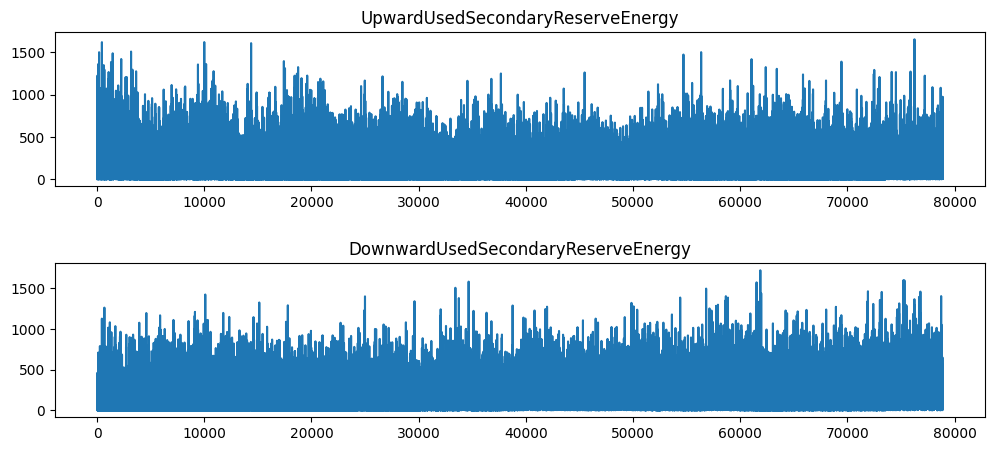

In [13]:
import matplotlib.dates as mdates
def first_day_of_each_year(start_date, end_date):
    start_year = start_date.year
    end_year = end_date.year
    first_days = [pd.Timestamp(year, 1, 1) for year in range(start_year, end_year + 1)]
    return first_days



nrows = 2
ncols = 1
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5))

# Adjust the vertical spacing here
plt.subplots_adjust(hspace = 0.5)

# Check target distribution
for count, col in enumerate(columns_Y):
    dataset[col].plot(ax=np.array(axis).flatten()[count])
    axis.flatten()[count].set_title(col)
    #ax.xaxis.set_major_locator(mdates.YearLocator())
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

figure_name = "targets_timeseries.png"

plt.savefig(os.path.join(folder_figures, figure_name))


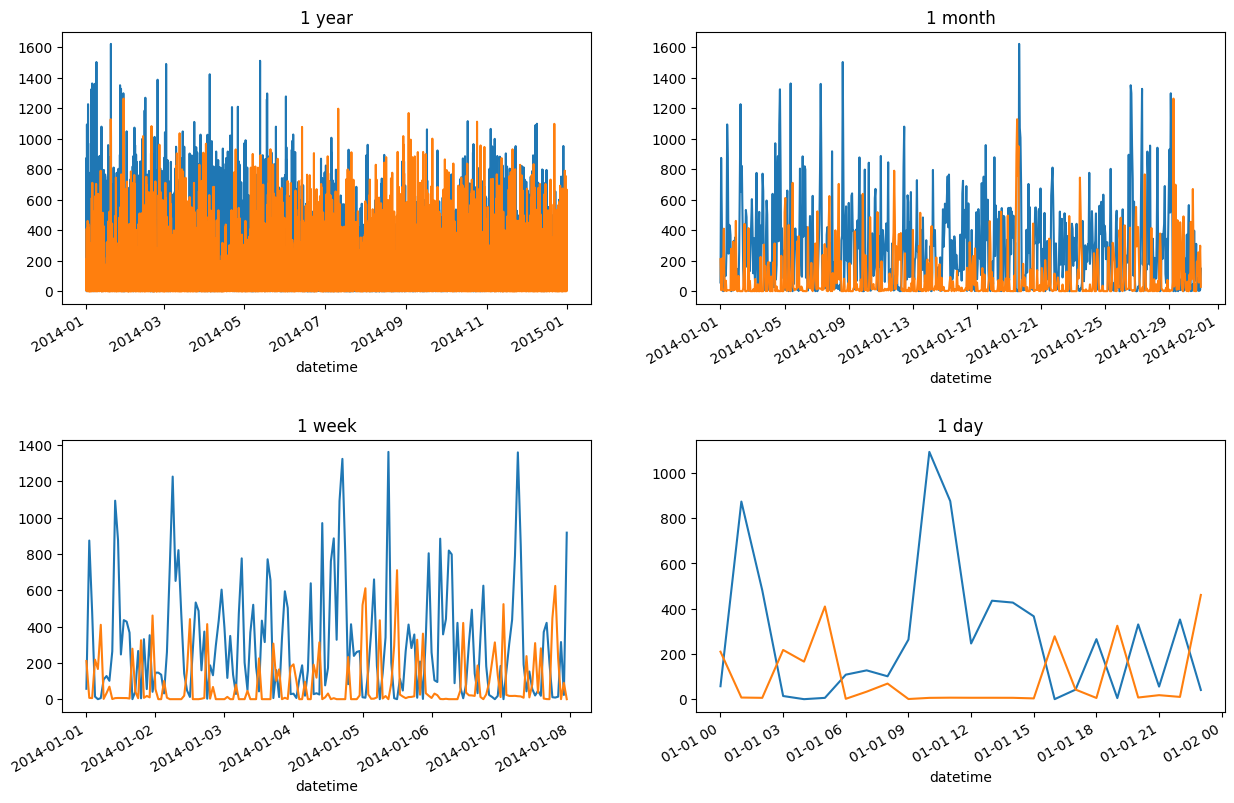

In [14]:
import matplotlib.dates as mdates

# Select relevant columns and set the datetime column as index
dataset2 = dataset.set_index('datetime')

# 1 year = 24*365 hours, 1 month = 24*30 hours, 1 week = 24*7 hours, 1 day = 24 hours
time_ranges = [24*365, 24*30, 24*7, 24]
time_ranges_names = ['1 year', '1 month', '1 week', '1 day']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

# Check target distribution
for ax, time_range, time_range_name in zip(axs, time_ranges, time_ranges_names):
    for count, col in enumerate(columns_Y):
        dataset2[col].iloc[:time_range].plot(ax=ax)

    ax.set_title(time_range_name)
    #ax.xaxis.set_major_locator(mdates.YearLocator())
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust the vertical spacing here
plt.subplots_adjust(hspace = 0.5)


figure_name = "target_timeseries_windows.png"

plt.savefig(os.path.join(folder_figures, figure_name))


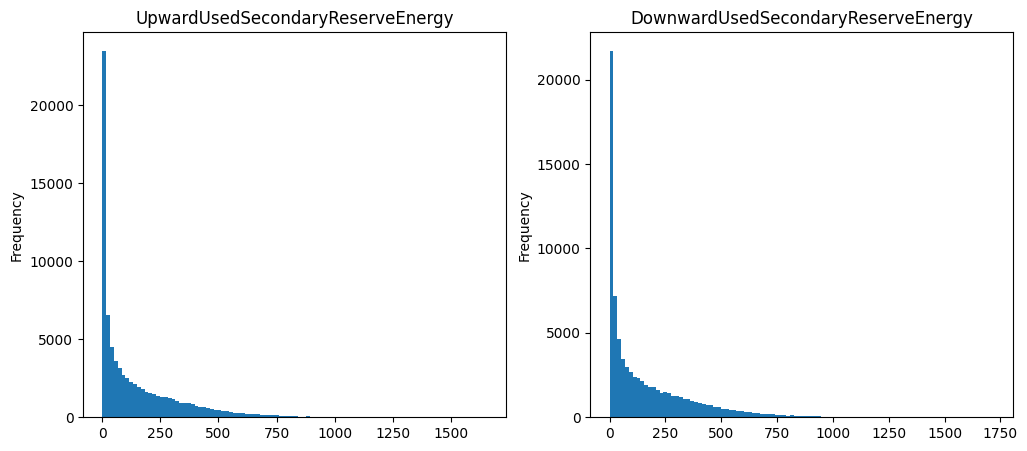

In [6]:

nrows = 1
ncols = 2
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5))

# Check target distribution
for count, col in enumerate(columns_Y):
    dataset[col].plot.hist(bins=100, ax=np.array(axis).flatten()[count])
    axis.flatten()[count].set_title(col)


figure_name = "target_histograms.png"

plt.savefig(os.path.join(folder_figures, figure_name))


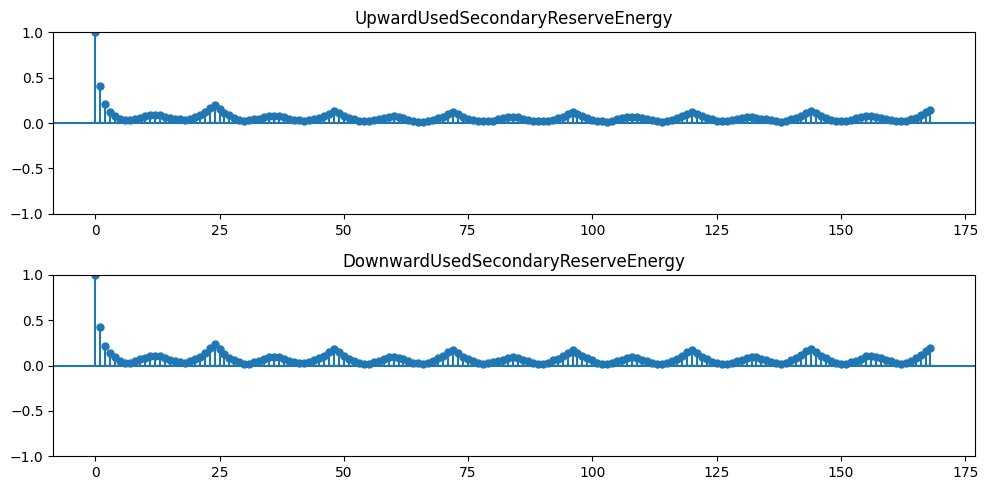

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

# Select relevant columns and set the datetime column as index
dataset2 = dataset.set_index('datetime')
lag_time=24*7

fig, axs = plt.subplots(len(columns_Y), figsize=(10, 5))

for i, col in enumerate(columns_Y):
    # Calculate and plot the autocorrelation for each variable
    plot_acf(dataset2[col], lags=lag_time, ax=axs[i], title=col)

# Show the autocorrelation plots
figure_name = "autocorrelation.png"

plt.tight_layout()
plt.savefig(os.path.join(folder_figures, figure_name))


In [8]:
help(plot_acf)

Help on function plot_acf in module statsmodels.graphics.tsaplots:

plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)
    Plot the autocorrelation function
    
    Plots lags on the horizontal and the correlations on vertical axis.
    
    Parameters
    ----------
    x : array_like
        Array of time-series values
    ax : AxesSubplot, optional
        If given, this subplot is used to plot in instead of a new figure being
        created.
    lags : {int, array_like}, optional
        An int or array of lag values, used on horizontal axis. Uses
        np.arange(lags) when lags is an int.  If not provided,
        ``lags=np.arange(len(corr))`` is used.
    alpha : scalar, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidenc

In [9]:
dataset.drop(datetime_col, axis=1, inplace=True)
columns_X = dataset.columns[~dataset.columns.isin(columns_Y)]

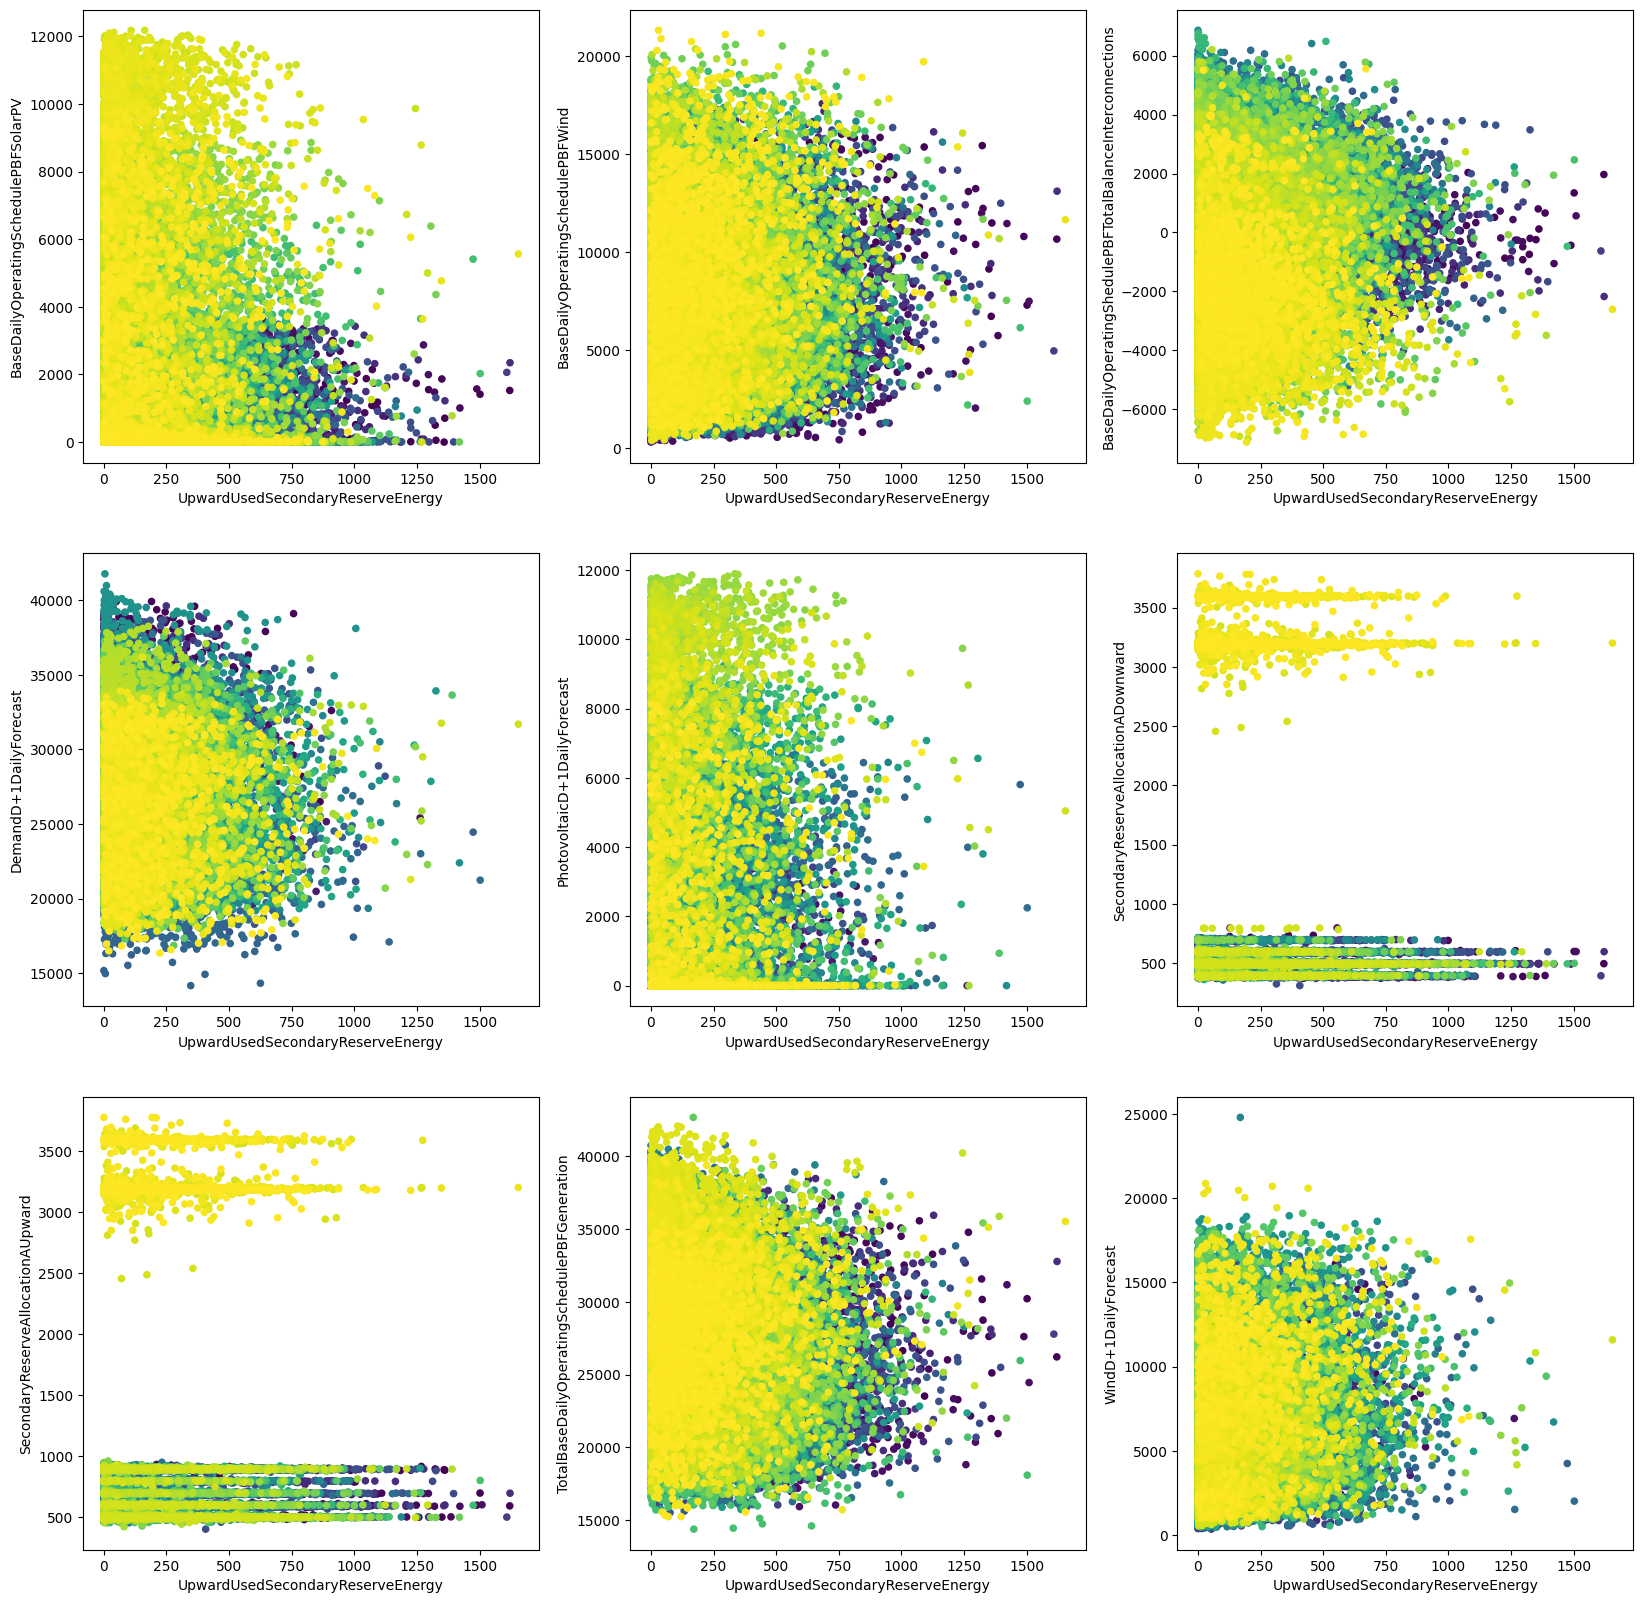

In [10]:
# Scatterplot with Y and every X
#################################################################################
# FIGURE SETTING
import math

n_plots = len(columns_X)
sqrt_n_plots = math.ceil(math.sqrt(n_plots))

if sqrt_n_plots > 3:
    ncols = 3
else:
    ncols = sqrt_n_plots
nrows = math.ceil(n_plots / ncols)
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
count = 0

for col_x in columns_X:

    dataset.plot.scatter(columns_Y[0], col_x, ax=np.array(axis).flatten()[count], c=np.arange(len(dataset)), 
                    cmap=plt.cm.viridis, colorbar=False)
    
    count +=1

figure_name = "feature_correlation.png"

plt.savefig(os.path.join(folder_figures, figure_name))
plt.show()
